# Division of cognitive labor
Natalia Vélez, March 2020

Adapted from:
Kitcher, P. (1990). The division of cognitive labor. The journal of philosophy, 87(1), 5-22.

Kitcher (1990) poses the question:  What is the optimal division of labor within a scientific field, and how do epistemic or non-epistemic (e.g., prestige) interests lead us closer or farther from it? Is it possible that there is a mismatch between what is good for the individual and what is good for the field? (For example, if everyone pursued the theories that had the broadest support, the scientific community as a whole would suffer for not having hedged its bets.) 

The paper presents a loose model, verbally describes contexts where these mismatches occur, and proposes some non-epistemic mechanisms that may help align individual and community goals. (For example: In science, a desire for fame/prestige drives scientists to diversify the problems they work on.)

I thought it might be interesting to examine similar mismatches within our dataset; for example, individuals benefit from eating a wide variety of foods prepared by the village, but the village as a whole would suffer. As a starting point, I attempt to implement the model described in the paper.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Formulation of the problem**

> "Once there was a very important molecule (VIM). Many people in the chemical community wanted to know the structure of VIM. Two methods for fathoming the structure were available. Method I involved using X-ray crystallography, inspecting the resultant photographs and using them to eliminate possibilities about bonding patterns. Method II involved guesswork and the building of tinker-toy models. Everybody agreed that the chances that an individual would discover the structure of VIM by using method I were greater than the chances that that individual would discover the structure by using method II. Since all members of the community were thoroughly rational, each chemist used method I. They are still working on the problem."

Each method has some asymptotic probability of finding the truth ($p_i$) and a _return_ function ($f_i(n)$) that describes the probability  of finding the solution after assigning $n$ workers to the problem.

For simplicity, we assume that _both_ methods cannot work ($p_1 + p_2 < 1$) and that one method is intrinsically more promising than the other ($p_1$ > $p_2$).

$f_i(\cdot)$ could take many forms, and each method may have a different return function. To simplify, we use the logistic growth equations described in the paper:

$$
p_i(n) =
\begin{cases}
    p_{0,i}(3n^2-2n^3/kN)/k^2N^2& \text{if } n < kN\\
    p_{0,i}              & \text{otherwise}
\end{cases}
$$

In [15]:
def return_fun(n, k, N, p_0):
    if n >= k*N:
        p = p_0
    else:
        p = p_0*(3*n**2 - 2*n**3/k*N)/(k**2*N**2)
        
    return p
    
def community_distribution(n1, n2, k):
    N = n1+n2
    r1 =  return_fun(n1, k, N, P0[0])
    r2 =  return_fun(n1, k, N, P0[1])
    return r1 + r2

In [18]:
?growth_df.apply

In [25]:
N = 100
k = np.linspace(.5, 1.5, 11)
P0 = [0.6, 0.3]
n = np.arange(0, N+1)

growth_list = [(ni, N-ni, ki) for ni in n for ki in k]
growth_df = pd.DataFrame(growth_list, columns = ['n1', 'n2', 'k'])
growth_df['CO'] = np.vectorize(community_distribution)(growth_df['n1'], growth_df['n2'], growth_df['k'])
growth_df['regime'] = np.where(growth_df['n1'] < growth_df['k']*100, 'n < kN', 'n $\geq$ kN')
growth_df.head()

,n1,n2,k,CO,regime
0,0,100,0.5,0.0,n < kN
1,0,100,0.6,0.0,n < kN
2,0,100,0.7,0.0,n < kN
3,0,100,0.8,0.0,n < kN
4,0,100,0.9,0.0,n < kN


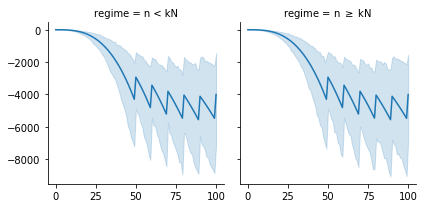

In [28]:
g = sns.FacetGrid(data=growth_df, col='regime')
g.map(sns.lineplot, data=growth_df, x='n1', y ='CO')

^ This is not at all right; come back to this